In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [3]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
url_api= 'https://restcountries.eu/rest/v2/all'
html = urlopen(url)
page =  requests.get(url_api)

In [4]:
print(page.json()[:2])
      

[{'name': 'Afghanistan', 'topLevelDomain': ['.af'], 'alpha2Code': 'AF', 'alpha3Code': 'AFG', 'callingCodes': ['93'], 'capital': 'Kabul', 'altSpellings': ['AF', 'Afġānistān'], 'region': 'Asia', 'subregion': 'Southern Asia', 'population': 27657145, 'latlng': [33.0, 65.0], 'demonym': 'Afghan', 'area': 652230.0, 'gini': 27.8, 'timezones': ['UTC+04:30'], 'borders': ['IRN', 'PAK', 'TKM', 'UZB', 'TJK', 'CHN'], 'nativeName': 'افغانستان', 'numericCode': '004', 'currencies': [{'code': 'AFN', 'name': 'Afghan afghani', 'symbol': '؋'}], 'languages': [{'iso639_1': 'ps', 'iso639_2': 'pus', 'name': 'Pashto', 'nativeName': 'پښتو'}, {'iso639_1': 'uz', 'iso639_2': 'uzb', 'name': 'Uzbek', 'nativeName': 'Oʻzbek'}, {'iso639_1': 'tk', 'iso639_2': 'tuk', 'name': 'Turkmen', 'nativeName': 'Türkmen'}], 'translations': {'de': 'Afghanistan', 'es': 'Afganistán', 'fr': 'Afghanistan', 'ja': 'アフガニスタン', 'it': 'Afghanistan', 'br': 'Afeganistão', 'pt': 'Afeganistão', 'nl': 'Afghanistan', 'hr': 'Afganistan', 'fa': 'افغانس

In [5]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [6]:
title = soup.title
print(title)

<title>2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results</title>


In [7]:
text = soup.get_text()


In [8]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com/
#individual
#team
/results/2017GPTR
/results/summary/2017GPTR10K
None
#tabs-1
None
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [9]:
rows = soup.find_all('tr')
print(rows[:10])
print(len(rows))

[<tr colspan="2"><b>10K:</b></tr>, <tr><td>Finishers:</td><td>577</td></tr>, <tr><td>Male:</td><td>414</td></tr>, <tr><td>Female:</td><td>163</td></tr>, <tr>
<td>Award</td>
<td>Name</td>
<td>Combined Time</td>
<td>1</td><td>2</td><td>3</td><td>4</td></tr>, <tr><td>1ST</td>
<td>DTNA2</td>
<td>02:54:41</td>
<td>00:40:36 - ANDY WEDAM</td><td>00:44:05 - VASILIOS TSIRIMIAGOS</td><td>00:44:48 - ANDRE RAUCH</td><td>00:45:10 - JONATHAN PARSONS</td></tr>, <tr><td>2ND</td>
<td>INTEL TEAM K</td>
<td>03:01:02</td>
<td>00:41:43 - WILLIAM BARRY</td><td>00:42:36 - EDDIE J FRIE</td><td>00:43:46 - SAMANTHA BAGLEY</td><td>00:52:55 - JOHN HAMILTON</td></tr>, <tr><td>3RD</td>
<td>INTEL TEAM F</td>
<td>03:06:06</td>
<td>00:36:42 - NATHAN A SUSTERSIC</td><td>00:39:21 - DEREK G OSBORNE</td><td>00:52:47 - CODY L COVEY</td><td>00:57:16 - VIRAJ P MODAK</td></tr>, <tr><td>4TH</td>
<td>DTNA1</td>
<td>03:15:33</td>
<td>00:40:28 - WITALI SPULING</td><td>00:46:45 - INGA ANDREYEVA</td><td>00:54:09 - KEATON WEISENBORN

In [10]:
for row in rows:
    row_td = row.find_all('td')


In [11]:
str_cells = str(row_td)

cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[577, 443, LIBBY B MITCHELL, F, HILLSBORO, OR, 1:41:18, 16:20, 163 of 163, F 36-45, 56 of 56, 0:52, 1:42:10, ]


In [12]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)


[577, 443, LIBBY B MITCHELL, F, HILLSBORO, OR, 1:41:18, 16:20, 163 of 163, F 36-45, 56 of 56, 0:52, 1:42:10, ]


str

In [13]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,"[Award, Name, Combined Time, 1, 2, 3, 4]"
5,"[1ST, DTNA2, 02:54:41, 00:40:36 - ANDY WEDAM, ..."
6,"[2ND, INTEL TEAM K, 03:01:02, 00:41:43 - WILLI..."
7,"[3RD, INTEL TEAM F, 03:06:06, 00:36:42 - NATHA..."
8,"[4TH, DTNA1, 03:15:33, 00:40:28 - WITALI SPULI..."
9,"[5TH, FXG1, 03:21:16, 00:42:56 - DAVID HERRON,..."


In [14]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[],None,None,None,None,None,None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,[Award,Name,Combined Time,1,2,3,4],None,None,None,None,None,None,None
5,[1ST,DTNA2,02:54:41,00:40:36 - ANDY WEDAM,00:44:05 - VASILIOS TSIRIMIAGOS,00:44:48 - ANDRE RAUCH,00:45:10 - JONATHAN PARSONS],None,None,None,None,None,None,None
6,[2ND,INTEL TEAM K,03:01:02,00:41:43 - WILLIAM BARRY,00:42:36 - EDDIE J FRIE,00:43:46 - SAMANTHA BAGLEY,00:52:55 - JOHN HAMILTON],None,None,None,None,None,None,None
7,[3RD,INTEL TEAM F,03:06:06,00:36:42 - NATHAN A SUSTERSIC,00:39:21 - DEREK G OSBORNE,00:52:47 - CODY L COVEY,00:57:16 - VIRAJ P MODAK],None,None,None,None,None,None,None
8,[4TH,DTNA1,03:15:33,00:40:28 - WITALI SPULING,00:46:45 - INGA ANDREYEVA,00:54:09 - KEATON WEISENBORN,00:54:10 - MAISIE WEISENBORN],None,None,None,None,None,None,None
9,[5TH,FXG1,03:21:16,00:42:56 - DAVID HERRON,00:46:35 - LEO SOTO,00:53:59 - TONY GONZALEZ,00:57:45 - ARINDA SCHRUM],None,None,None,None,None,None,None


In [15]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,Award,Name,Combined Time,1,2,3,4],None,None,None,None,None,None,None
5,1ST,DTNA2,02:54:41,00:40:36 - ANDY WEDAM,00:44:05 - VASILIOS TSIRIMIAGOS,00:44:48 - ANDRE RAUCH,00:45:10 - JONATHAN PARSONS],None,None,None,None,None,None,None
6,2ND,INTEL TEAM K,03:01:02,00:41:43 - WILLIAM BARRY,00:42:36 - EDDIE J FRIE,00:43:46 - SAMANTHA BAGLEY,00:52:55 - JOHN HAMILTON],None,None,None,None,None,None,None
7,3RD,INTEL TEAM F,03:06:06,00:36:42 - NATHAN A SUSTERSIC,00:39:21 - DEREK G OSBORNE,00:52:47 - CODY L COVEY,00:57:16 - VIRAJ P MODAK],None,None,None,None,None,None,None
8,4TH,DTNA1,03:15:33,00:40:28 - WITALI SPULING,00:46:45 - INGA ANDREYEVA,00:54:09 - KEATON WEISENBORN,00:54:10 - MAISIE WEISENBORN],None,None,None,None,None,None,None
9,5TH,FXG1,03:21:16,00:42:56 - DAVID HERRON,00:46:35 - LEO SOTO,00:53:59 - TONY GONZALEZ,00:57:45 - ARINDA SCHRUM],None,None,None,None,None,None,None


In [16]:
col_labels = soup.find_all('th')

In [17]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time, Team]']


In [18]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [19]:
df3 = df2[0].str.split(',',expand = True)
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]


In [20]:
frame = [df3,df1]
df4 = pd.concat(frame)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,Award,Name,Combined Time,1,2,3,4],None,None,None,None,None,None,None
5,1ST,DTNA2,02:54:41,00:40:36 - ANDY WEDAM,00:44:05 - VASILIOS TSIRIMIAGOS,00:44:48 - ANDRE RAUCH,00:45:10 - JONATHAN PARSONS],None,None,None,None,None,None,None
6,2ND,INTEL TEAM K,03:01:02,00:41:43 - WILLIAM BARRY,00:42:36 - EDDIE J FRIE,00:43:46 - SAMANTHA BAGLEY,00:52:55 - JOHN HAMILTON],None,None,None,None,None,None,None
7,3RD,INTEL TEAM F,03:06:06,00:36:42 - NATHAN A SUSTERSIC,00:39:21 - DEREK G OSBORNE,00:52:47 - CODY L COVEY,00:57:16 - VIRAJ P MODAK],None,None,None,None,None,None,None
8,4TH,DTNA1,03:15:33,00:40:28 - WITALI SPULING,00:46:45 - INGA ANDREYEVA,00:54:09 - KEATON WEISENBORN,00:54:10 - MAISIE WEISENBORN],None,None,None,None,None,None,None


In [21]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head(5)

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None


In [22]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 596
Data columns (total 14 columns):
[Place              598 non-null object
 Bib                596 non-null object
 Name               593 non-null object
 Gender             593 non-null object
 City               593 non-null object
 State              593 non-null object
 Chip Time          593 non-null object
 Chip Pace          578 non-null object
 Gender Place       578 non-null object
 Age Group          578 non-null object
 Age Group Place    578 non-null object
 Time to Start      578 non-null object
 Gun Time           578 non-null object
 Team]              578 non-null object
dtypes: object(14)
memory usage: 70.1+ KB


(598, 14)

In [23]:
df6 = df5.dropna(axis=0, how='any')

In [24]:
df6.shape

(578, 14)

In [25]:
df7 = df6.drop(df6.index[0])
df7.head(5)

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
20,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
21,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
22,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
23,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
24,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F]


In [26]:
df7.rename(columns={'[Place':'Place'},inplace =True)
df7.rename(columns={' Team]':'Team'},inplace =True)

In [27]:
df7.rename(columns={'[Place':'Place'},inplace =True)

In [28]:
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
20,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
21,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
22,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
23,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
24,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F]


In [29]:
time_list = df7[' Chip Time'].tolist()

In [30]:
len(time_list)

577

In [31]:
time_min = []

for each in time_list:
    if each.count(':') == 1:
        m,s = each.split(':')
        math = (int(m) * 60 + int(s))/60
    else:
        h,m,s = each.split(':')
        math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_min.append(math)
    
  

In [32]:
time_min[200]

53.96666666666667

In [33]:
df7['Running Time'] = time_min

In [34]:
df7.describe()

,Running Time
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


In [35]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

([<matplotlib.axis.XTick at 0x153659396a0>],
 <a list of 1 Text xticklabel objects>)

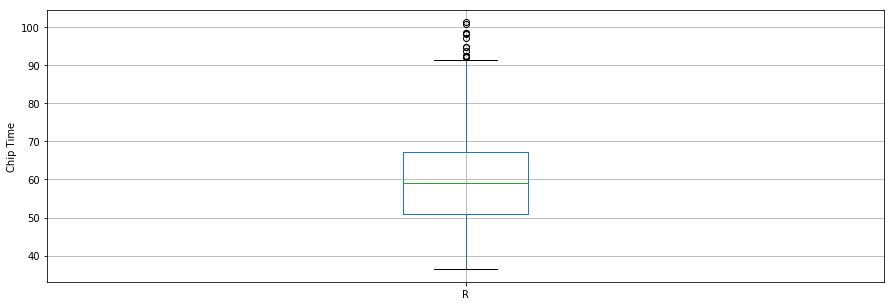

In [36]:
df7.boxplot(column='Running Time')
plt.grid(True,axis = 1)
plt.ylabel("Chip Time")
plt.xticks([1],'Runners')



[]

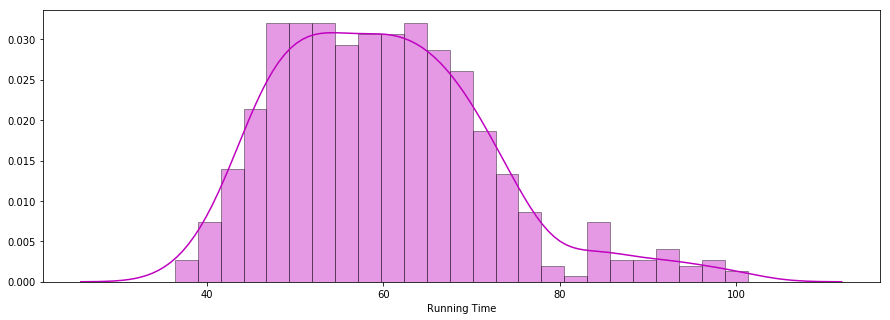

In [37]:
x = df7['Running Time']
ax = sns.distplot(x,hist =True, kde = True , rug = False,color = 'm', bins = 25, hist_kws = {'edgecolor' : 'black'})
ax.plot()                                                                                         
                                                                                             

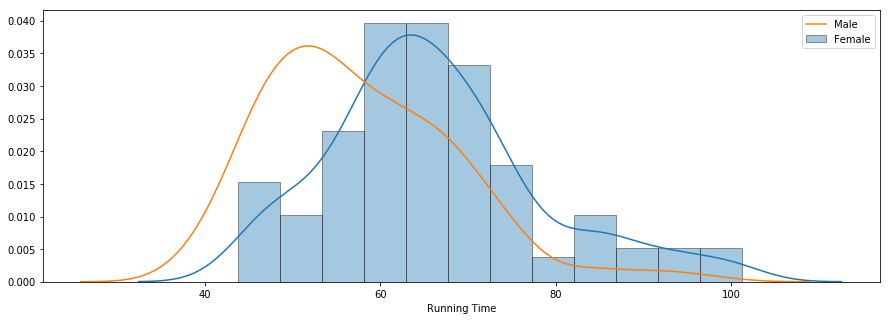

In [38]:
f_fuko = df7.loc[df7[' Gender'] == ' F']['Running Time']
m_fuko = df7.loc[df7[' Gender'] == ' M']['Running Time']
sns.distplot(f_fuko,hist = True, kde = True, rug = False, hist_kws = {'edgecolor':'black'},label ='Female')
sns.distplot(m_fuko,hist = False, kde = True, rug = False, hist_kws = {'edgecolor':'black'},label = 'Male')

In [39]:
g_states = df7.groupby(' Gender',as_index= True).describe()
g_states

Running Time                                                         \
               count       mean        std        min        25%        50%   
 Gender                                                                       
 F             163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M             414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
 F       72.058333  101.300000  
 M       64.804167   98.516667

Text(0.5, 0.98, '')

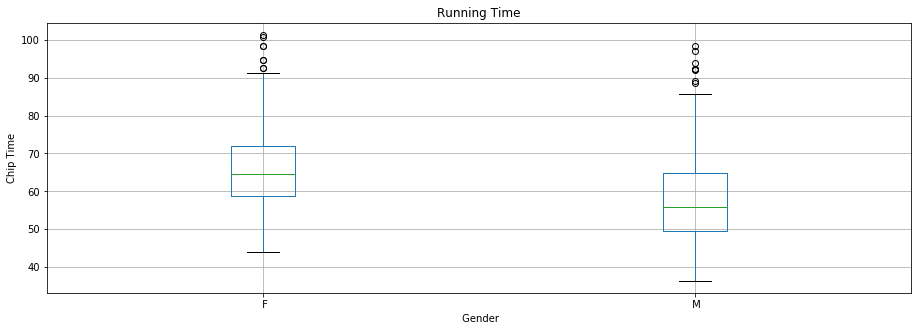

In [40]:
df7.boxplot(column='Running Time',by = ' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")